# 1. Pemahaman Bisnis

##### Masalah: 
Tingkat churn pelanggan (pelanggan berhenti menggunakan layanan) cukup tinggi di cabang Palu. 

##### Tujuan :
Mengidentifikasi faktor-faktor yang memengaruhi churn dan memberikan rekomendasi strategi marketing untuk mengurangi churn.


# 2. Pemahaman dan Persiapan Data

### Import Data

In [1]:
import pandas as pd

dt = pd.read_excel('telecom_marketing_dummy_data.xlsx')
dt.head()

,CustomerID,Age,Gender,Tenure,MonthlySpend,InternetService,ContractType,PaymentMethod,MarketingOffer,Churn
0,CUST0001,58,Male,14,371000.0,DSL,TwoYear,BankTransfer,Yes,Yes
1,CUST0002,25,Male,49,886000.0,DSL,Monthly,Cash,No,No
2,CUST0003,19,Male,5,314000.0,No,Monthly,Cash,Yes,Yes
3,CUST0004,65,Male,61,954000.0,No,TwoYear,Cash,No,Yes
4,CUST0005,35,Female,29,450000.0,DSL,TwoYear,CreditCard,Yes,No


In [3]:
dt.tail()

,CustomerID,Age,Gender,Tenure,MonthlySpend,InternetService,ContractType,PaymentMethod,MarketingOffer,Churn
195,CUST0196,19,Female,49,833000.0,No,OneYear,Cash,No,No
196,CUST0197,25,Female,42,925000.0,No,TwoYear,BankTransfer,Yes,Yes
197,CUST0198,41,Male,28,467000.0,DSL,TwoYear,CreditCard,Yes,Yes
198,CUST0199,37,Female,59,495000.0,No,TwoYear,BankTransfer,Yes,No
199,CUST0200,33,Male,42,339000.0,Fiber,TwoYear,Cash,Yes,No


### Informasi Kolom

- CustomerID: ID pelanggan.
- Age: Usia pelanggan.
- Gender: Jenis kelamin pelanggan (Male/Female).
- Tenure: Lama menjadi pelanggan (bulan).
- MonthlySpend: Rata-rata pengeluaran bulanan pelanggan (Rp).
- InternetService: Jenis layanan internet (Fiber, DSL, No).
- ContractType: Jenis kontrak (Monthly, OneYear, TwoYear).
- PaymentMethod: Metode pembayaran (CreditCard, BankTransfer, Cash).
- MarketingOffer: Apakah pelanggan pernah mendapatkan penawaran khusus marketing (Yes/No).
- Churn: Status churn (Yes/No).

### Informasi DataFrame

In [7]:
dt.info

<bound method DataFrame.info of     CustomerID  Age  Gender  Tenure  MonthlySpend InternetService  \
0     CUST0001   58    Male      14      371000.0             DSL   
1     CUST0002   25    Male      49      886000.0             DSL   
2     CUST0003   19    Male       5      314000.0              No   
3     CUST0004   65    Male      61      954000.0              No   
4     CUST0005   35  Female      29      450000.0             DSL   
..         ...  ...     ...     ...           ...             ...   
195   CUST0196   19  Female      49      833000.0              No   
196   CUST0197   25  Female      42      925000.0              No   
197   CUST0198   41    Male      28      467000.0             DSL   
198   CUST0199   37  Female      59      495000.0              No   
199   CUST0200   33    Male      42      339000.0           Fiber   

    ContractType PaymentMethod MarketingOffer Churn  
0        TwoYear  BankTransfer            Yes   Yes  
1        Monthly          Cash 

In [8]:
dt.dtypes

CustomerID          object
Age                  int64
Gender              object
Tenure               int64
MonthlySpend       float64
InternetService     object
ContractType        object
PaymentMethod       object
MarketingOffer      object
Churn               object
dtype: object

In [11]:
dt.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlySpend       0
InternetService    0
ContractType       0
PaymentMethod      0
MarketingOffer     0
Churn              0
dtype: int64

In [76]:
dt.duplicated().sum()

0

In [12]:
dt.shape

(200, 10)

In [14]:
dt.nunique()

CustomerID         200
Age                 47
Gender               2
Tenure              69
MonthlySpend       185
InternetService      3
ContractType         3
PaymentMethod        3
MarketingOffer       2
Churn                2
dtype: int64

### To Do :

Data aman tanpa ada data yang hilang atau kosong dengan tipe data yang digunakan untuk tiap kolomnya sudah tepat

# 3. Eksplorasi Data (EDA)

### Analisis Distribusi Data

Tampilkan statistik deskriptif untuk kolom numerik agar kita dapat melihat gambaran umum tentang distribusi data.

In [15]:
dt.describe()

,Age,Tenure,MonthlySpend
count,200.000000,200.000000,200.000000
mean,41.435000,39.155000,506285.000000
std,14.115666,20.010323,261722.231396
min,18.000000,1.000000,62000.000000
25%,29.750000,24.750000,294500.000000
50%,41.000000,41.000000,493500.000000
75%,54.250000,56.000000,714750.000000
max,65.000000,72.000000,997000.000000


##### Short Insight :

1) Usia Pelanggan (Age):

Rata-rata usia pelanggan adalah 41 tahun, dengan standar deviasi sekitar 14 tahun. Ini menunjukkan variasi yang cukup besar di usia pelanggan.
Usia pelanggan berkisar dari 18 tahun (minimum) hingga 65 tahun (maksimum), dengan 50% pelanggan berusia di bawah 41 tahun.

2) Lama Menjadi Pelanggan (Tenure):

Pelanggan memiliki rata-rata lama berlangganan sekitar 39 bulan, dengan standar deviasi sekitar 20 bulan.
Lama berlangganan berkisar dari 1 bulan (minimum) hingga 72 bulan (maksimum).
Kuartil ke-1 adalah 25 bulan, kuartil ke-2 (median) adalah 41 bulan, dan kuartil ke-3 adalah 56 bulan. Ini menunjukkan bahwa sebagian besar pelanggan telah berlangganan dalam jangka waktu yang relatif lama.

3) Pengeluaran Bulanan (MonthlySpend):

Rata-rata pengeluaran bulanan pelanggan adalah sekitar Rp506.285, dengan standar deviasi sebesar Rp261.722. Ini menunjukkan ada variasi pengeluaran bulanan yang signifikan antar pelanggan.
Pengeluaran bulanan berkisar dari Rp62.000 (minimum) hingga Rp997.000 (maksimum).
Kuartil menunjukkan bahwa:
25% pelanggan menghabiskan kurang dari Rp294.500 per bulan.
50% pelanggan (median) menghabiskan kurang dari Rp493.500 per bulan.
25% pelanggan teratas menghabiskan lebih dari Rp714.750 per bulan.

4) Kesimpulan dari Distribusi:

- Segmentasi Usia: Sebagian besar pelanggan berada pada usia produktif (18-65 tahun), tetapi ada variasi yang signifikan, sehingga strategi pemasaran bisa disesuaikan dengan kelompok usia.
- Retensi Pelanggan: Banyak pelanggan telah berlangganan cukup lama (di atas median 41 bulan), tetapi ada juga pelanggan yang baru berlangganan (1 bulan). Hal ini menunjukkan ada peluang untuk meningkatkan retensi pada pelanggan baru.
- Pengeluaran Bulanan: Pengeluaran bulanan pelanggan sangat bervariasi. Pelanggan dengan pengeluaran yang lebih tinggi mungkin lebih loyal atau memiliki kebutuhan layanan yang lebih banyak, sehingga dapat menjadi target utama untuk penawaran khusus.

### Analisis Target Churn

Karena fokus utama analisis adalah pada churn, mari kita lihat sebaran data untuk kolom Churn.
Ini akan membantu kita memahami apakah churn tersebar merata atau lebih cenderung ke salah satu kategori (Yes atau No).

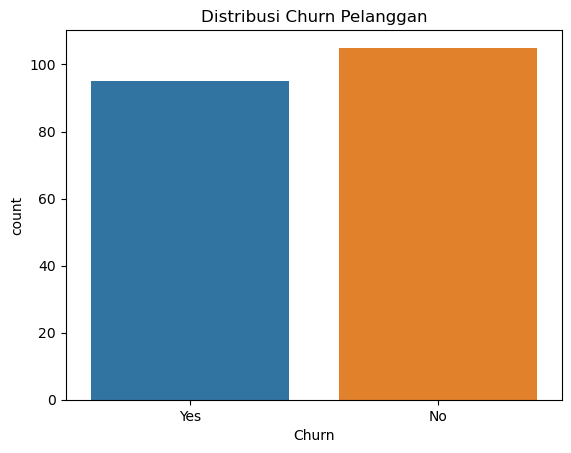

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi churn
sns.countplot(x='Churn', data=dt)
plt.title('Distribusi Churn Pelanggan')
plt.show()

In [29]:
dt[dt['Churn']=='Yes'].count()

CustomerID         95
Age                95
Gender             95
Tenure             95
MonthlySpend       95
InternetService    95
ContractType       95
PaymentMethod      95
MarketingOffer     95
Churn              95
dtype: int64

###### Short Insight :

Persebaran cukup merata dengan selisih 10 angka, lebih banyak Churn dengan kategori 'No'

1. Distribusi Churn:

Dari visualisasi menggunakan sns.countplot, terlihat bahwa churn pelanggan tidak terlalu timpang. Jumlah pelanggan yang churn ("Yes") adalah 95 pelanggan, sedangkan yang tidak churn ("No") adalah 105 pelanggan.
Kesimpulan awal:
Dataset ini cukup seimbang dalam hal target variabel (Churn). Ini berarti analisis atau model prediksi yang akan dibuat tidak perlu terlalu khawatir tentang masalah imbalanced data, yang biasanya memerlukan penanganan khusus seperti oversampling atau undersampling.
Proporsi Churn:

2. Persentase churn dihitung sebagai:

**Persentase churn** = (95/200) × 100 = **47.5%**

Ini menunjukkan bahwa hampir separuh pelanggan (47.5%) mengalami churn, sementara sisanya (52.5%) tetap menggunakan layanan.

3. Implikasi:

Tingkat churn yang tinggi ini menjadi perhatian serius karena hampir setengah pelanggan meninggalkan layanan. Hal ini berpotensi menurunkan pendapatan perusahaan secara signifikan jika tidak segera ditangani.

4. Rekomendasi awal:

Karena churn pelanggan cukup signifikan, analisis lebih lanjut perlu dilakukan untuk memahami faktor-faktor yang memengaruhinya, seperti:
- Tenure (lama berlangganan),
- MonthlySpend (pengeluaran bulanan),
- ContractType (jenis kontrak),
- InternetService (jenis layanan internet).
---
1) Fokuskan strategi untuk kelompok pelanggan dengan kategori churn "Yes", termasuk kemungkinan memberikan insentif atau strategi marketing yang lebih menarik.

2) Langkah selanjutnya adalah mengeksplorasi hubungan antara variabel-variabel prediktor dan churn untuk mengidentifikasi pola-pola yang signifikan.

# 4. Analisis Korelasi Anatar Variabel

Selanjutnya, kita perlu melihat hubungan antar fitur yang ada, terutama antara variabel independen dan target (Churn).

### Korelasi Antara Fitur Numerik dengan Churn

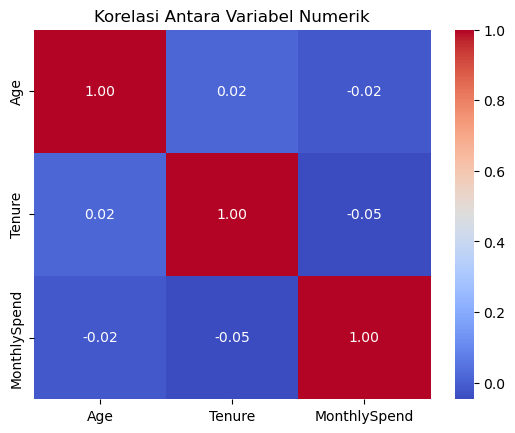

In [36]:
# Hitung korelasi antara kolom numerik
correlation_matrix = dt[['Age', 'Tenure', 'MonthlySpend']].corr()

# Visualisasi korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antara Variabel Numerik')
plt.show()

In [39]:
import pandas as pd

# Hitung korelasi antara kolom numerik
correlation_matrix = dt[['Age', 'Tenure', 'MonthlySpend']].corr()

# Ubah matriks korelasi menjadi format tabular
correlation_table = correlation_matrix.reset_index().melt(id_vars='index', var_name='Variable 2', value_name='Correlation')
correlation_table = correlation_table.rename(columns={'index': 'Variable 1'})

# Tampilkan tabel korelasi
print("Tabel Korelasi:\n")
print(correlation_table)

Tabel Korelasi:

     Variable 1    Variable 2  Correlation
0           Age           Age     1.000000
1        Tenure           Age     0.016394
2  MonthlySpend           Age    -0.015873
3           Age        Tenure     0.016394
4        Tenure        Tenure     1.000000
5  MonthlySpend        Tenure    -0.046998
6           Age  MonthlySpend    -0.015873
7        Tenure  MonthlySpend    -0.046998
8  MonthlySpend  MonthlySpend     1.000000


###### Short Insight

1. Korelasi antar fitur numerik (Age, Tenure, MonthlySpend):

Korelasi antar variabel numerik yang ditunjukkan dalam heatmap dan tabel memiliki nilai-nilai korelasi sebagai berikut:

- Age vs. Tenure: Korelasi rendah (0.016), menunjukkan tidak ada hubungan linear yang signifikan antara usia pelanggan dan lama berlangganan.

- Age vs. MonthlySpend: Korelasi rendah (-0.016), menunjukkan tidak ada hubungan signifikan antara usia pelanggan dan pengeluaran bulanan.

- Tenure vs. MonthlySpend: Korelasi rendah (-0.047), menunjukkan bahwa lama pelanggan berlangganan tidak memiliki hubungan linear yang signifikan dengan pengeluaran bulanan pelanggan.

- Korelasi diagonal (1.00) hanya mencerminkan hubungan variabel dengan dirinya sendiri.

*Note : Secara umum, korelasi di atas 0.7 atau di bawah -0.7 sering dianggap kuat, baik positif atau negatif.*

**Kesimpulan awal:**

Fitur numerik yang ada tidak saling berkorelasi secara kuat, artinya fitur ini dapat dianggap saling independen dan tidak redundan.

2. Implikasi untuk prediksi churn:

Karena nilai korelasi antar fitur numerik sangat kecil, ini menunjukkan bahwa fitur-fitur ini mungkin tidak terlalu berhubungan satu sama lain, sehingga dapat memberikan informasi unik dalam memprediksi churn. Namun, rendahnya korelasi antara variabel numerik ini tidak serta-merta menunjukkan hubungan dengan target (Churn), yang perlu dianalisis lebih lanjut.

3. Rekomendasi berikutnya:

Analisis hubungan dengan target (Churn):

Lakukan analisis tambahan, seperti:
- Boxplot atau histogram untuk membandingkan distribusi numerik (seperti Age, Tenure, MonthlySpend) terhadap label churn ("Yes" atau "No").
- Chi-square test atau ANOVA untuk menguji signifikansi hubungan antara fitur-fitur numerik dengan churn.

### Korelasi Antara Fitur Kategorikal dengan Churn

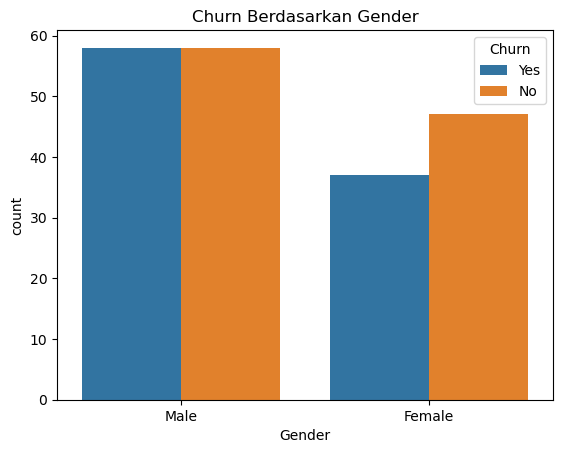

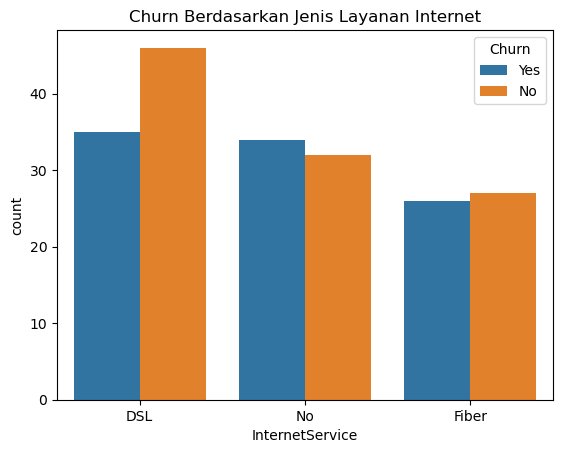

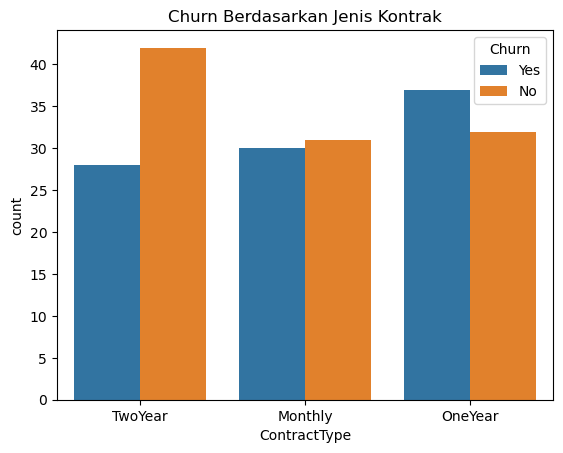

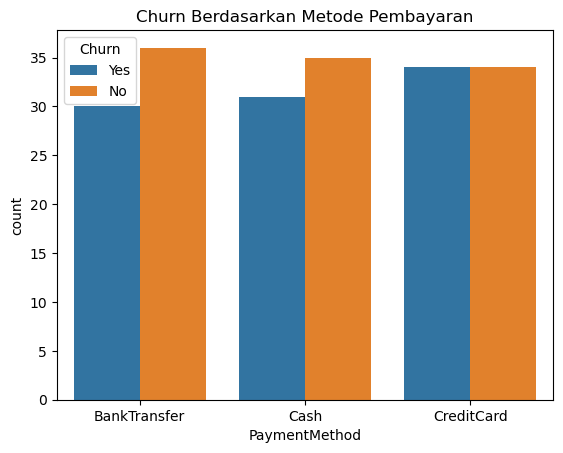

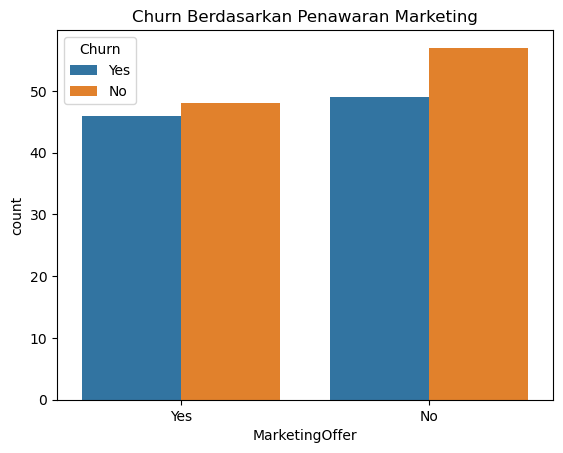

In [37]:
# Visualisasi hubungan antara fitur kategorikal dan Churn
sns.countplot(x='Gender', hue='Churn', data=dt)
plt.title('Churn Berdasarkan Gender')
plt.show()

sns.countplot(x='InternetService', hue='Churn', data=dt)
plt.title('Churn Berdasarkan Jenis Layanan Internet')
plt.show()

sns.countplot(x='ContractType', hue='Churn', data=dt)
plt.title('Churn Berdasarkan Jenis Kontrak')
plt.show()

sns.countplot(x='PaymentMethod', hue='Churn', data=dt)
plt.title('Churn Berdasarkan Metode Pembayaran')
plt.show()

sns.countplot(x='MarketingOffer', hue='Churn', data=dt)
plt.title('Churn Berdasarkan Penawaran Marketing')
plt.show()

In [40]:
import pandas as pd

# Hitung hubungan Gender dengan Churn
gender_churn_table = dt.groupby(['Gender', 'Churn']).size().reset_index(name='Count')
print("Tabel Gender dan Churn:\n", gender_churn_table)

# Hitung hubungan InternetService dengan Churn
internet_service_churn_table = dt.groupby(['InternetService', 'Churn']).size().reset_index(name='Count')
print("\nTabel Internet Service dan Churn:\n", internet_service_churn_table)

# Hitung hubungan ContractType dengan Churn
contract_type_churn_table = dt.groupby(['ContractType', 'Churn']).size().reset_index(name='Count')
print("\nTabel Contract Type dan Churn:\n", contract_type_churn_table)

# Hitung hubungan PaymentMethod dengan Churn
payment_method_churn_table = dt.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')
print("\nTabel Payment Method dan Churn:\n", payment_method_churn_table)

# Hitung hubungan MarketingOffer dengan Churn
marketing_offer_churn_table = dt.groupby(['MarketingOffer', 'Churn']).size().reset_index(name='Count')
print("\nTabel Marketing Offer dan Churn:\n", marketing_offer_churn_table)

Tabel Gender dan Churn:
    Gender Churn  Count
0  Female    No     47
1  Female   Yes     37
2    Male    No     58
3    Male   Yes     58

Tabel Internet Service dan Churn:
   InternetService Churn  Count
0             DSL    No     46
1             DSL   Yes     35
2           Fiber    No     27
3           Fiber   Yes     26
4              No    No     32
5              No   Yes     34

Tabel Contract Type dan Churn:
   ContractType Churn  Count
0      Monthly    No     31
1      Monthly   Yes     30
2      OneYear    No     32
3      OneYear   Yes     37
4      TwoYear    No     42
5      TwoYear   Yes     28

Tabel Payment Method dan Churn:
   PaymentMethod Churn  Count
0  BankTransfer    No     36
1  BankTransfer   Yes     30
2          Cash    No     35
3          Cash   Yes     31
4    CreditCard    No     34
5    CreditCard   Yes     34

Tabel Marketing Offer dan Churn:
   MarketingOffer Churn  Count
0             No    No     57
1             No   Yes     49
2            Yes

###### Short Insight :

1. Churn Berdasarkan Gender:

Insight:
- Pelanggan pria memiliki kemungkinan churn yang lebih tinggi dibandingkan wanita, karena jumlah pelanggan pria yang churn (58) sama besar dengan jumlah yang tidak churn.
- Perlu analisis lebih lanjut untuk memahami apakah faktor lain (seperti jenis layanan atau metode pembayaran) berkontribusi pada pola churn berdasarkan gender.

2. Churn Berdasarkan Jenis Layanan Internet:

Insight:
- Pelanggan yang tidak menggunakan layanan internet (No Internet) memiliki rasio churn yang lebih tinggi, karena jumlah pelanggan churn (34) sedikit lebih besar dibandingkan yang tidak churn (32).
- Pelanggan DSL dan Fiber memiliki distribusi churn yang cukup merata, tetapi pelanggan DSL memiliki jumlah churn yang lebih tinggi secara absolut dibandingkan Fiber.

3. Churn Berdasarkan Jenis Kontrak:

Insight:
- Kontrak bulanan (Monthly) memiliki distribusi churn yang hampir merata, artinya pelanggan dengan kontrak bulanan berisiko churn lebih tinggi dibandingkan jenis kontrak lainnya.
- Pelanggan dengan kontrak TwoYear lebih cenderung untuk tetap bertahan (jumlah churn lebih kecil, yaitu 28, dibandingkan yang tidak churn, yaitu 42).
- Kontrak jangka panjang mungkin menjadi strategi efektif untuk mengurangi churn.

4. Churn Berdasarkan Metode Pembayaran:

Insight:
- Pelanggan yang menggunakan CreditCard memiliki distribusi churn yang seimbang (Yes = 34, No = 34), sehingga kelompok ini memiliki risiko churn yang lebih tinggi dibandingkan metode lain.
- Pengguna BankTransfer memiliki churn yang lebih rendah secara proporsional (Yes = 30, No = 36).

5. Churn Berdasarkan Penawaran Marketing (Marketing Offer):

Insight:
- Penawaran marketing (Yes atau No) tampaknya tidak memiliki dampak signifikan terhadap churn, karena rasio churn untuk kedua kategori hampir merata.
- Strategi penawaran marketing mungkin perlu ditinjau ulang untuk meningkatkan efektivitasnya dalam mengurangi churn.

###### Rekomendasi untuk Analisis Lanjutan:

- Hubungan multivariat:
Analisis apakah fitur-fitur kategorikal berinteraksi satu sama lain dalam memengaruhi churn (misalnya, kombinasi jenis kontrak dengan metode pembayaran).

- Statistik inferensial:
Lakukan uji statistik seperti Chi-square test untuk menguji signifikansi hubungan antara setiap fitur kategorikal dengan churn.

- Segmentasi pelanggan:
Gunakan hasil ini untuk melakukan segmentasi pelanggan, misalnya dengan mengelompokkan pelanggan berisiko churn tinggi berdasarkan kontrak bulanan dan metode pembayaran.

Dengan langkah ini, insight lebih dalam dapat diperoleh untuk mendukung strategi pengurangan churn.

# 5. Analisis Faktor-faktor yang Mempengaruhi Churn

Berdasarkan hasil eksplorasi data di atas, Anda bisa melakukan analisis lebih lanjut untuk menentukan faktor-faktor yang mempengaruhi churn. 
Analisis ini dapat dilakukan dengan menggunakan beberapa teknik statistik atau model prediktif

### Uji Variabel Kategorikal

##### Uji Chi-Square

- Tujuan: Menguji hubungan antara dua variabel kategorikal.
- Kapan digunakan: Jika kedua variabel adalah kategorikal (contoh: Gender dan Churn).

In [56]:
import pandas as pd
import scipy.stats as stats

# Contoh dataset
# Pastikan mengganti 'dt' dengan dataset Anda yang telah dimuat
# dt = pd.read_csv('data.csv')

# Daftar variabel kategorikal (selain Churn)
categorical_columns = ['Gender', 'InternetService', 'ContractType', 'PaymentMethod', 'MarketingOffer']  # Ganti sesuai dataset Anda
target_column = 'Churn'  # Kolom target

# Hasil analisis chi-square
chi_square_results = []

for column in categorical_columns:
    # Membuat tabel kontingensi
    contingency_table = pd.crosstab(dt[column], dt[target_column])
    
    # Uji Chi-Square
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Tambahkan hasil ke daftar
    chi_square_results.append({
        'Variable': column,
        'Chi2 Statistic': chi2,
        'P-value': p,
        'Significant': 'Yes' if p < 0.05 else 'No'
    })

# Tampilkan hasil analisis dalam bentuk DataFrame
results_df = pd.DataFrame(chi_square_results)
print("Hasil Uji Chi-Square untuk Variabel Kategorikal:")
print(results_df)

# Interpretasi hasil
print("\nInterpretasi:")
for _, row in results_df.iterrows():
    print(f"Variabel {row['Variable']} memiliki hubungan yang {'signifikan' if row['Significant'] == 'Yes' else 'tidak signifikan'} dengan Churn (p-value = {row['P-value']:.4f}).")


Hasil Uji Chi-Square untuk Variabel Kategorikal:
          Variable  Chi2 Statistic   P-value Significant
0           Gender        0.474092  0.491111          No
1  InternetService        1.075991  0.583918          No
2     ContractType        2.685426  0.261136          No
3    PaymentMethod        0.288600  0.865628          No
4   MarketingOffer        0.058154  0.809437          No

Interpretasi:
Variabel Gender memiliki hubungan yang tidak signifikan dengan Churn (p-value = 0.4911).
Variabel InternetService memiliki hubungan yang tidak signifikan dengan Churn (p-value = 0.5839).
Variabel ContractType memiliki hubungan yang tidak signifikan dengan Churn (p-value = 0.2611).
Variabel PaymentMethod memiliki hubungan yang tidak signifikan dengan Churn (p-value = 0.8656).
Variabel MarketingOffer memiliki hubungan yang tidak signifikan dengan Churn (p-value = 0.8094).


###### Short Insight

**Uji Chi-Square (Variabel Kategorikal)**

Tidak ada hubungan signifikan antara variabel kategorikal (Gender, InternetService, ContractType, PaymentMethod, MarketingOffer) dengan Churn.

- Semua p-value untuk uji Chi-Square lebih besar dari 0.05, yang menunjukkan bahwa tidak ada hubungan yang signifikan antara variabel-variabel ini dengan churn.
- Hal ini mengindikasikan bahwa faktor-faktor seperti jenis kelamin, jenis layanan internet, tipe kontrak, metode pembayaran, dan penawaran pemasaran tidak berkontribusi secara signifikan terhadap kemungkinan churn pelanggan pada dataset ini.

### Uji Variabel Numerik

##### Pearson

- Tujuan: Mengukur hubungan linear antara dua variabel numerik.
- Kapan digunakan: Jika kedua variabel berskala interval atau rasio (contoh: Age dan MonthlySpend).

In [57]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Contoh dataset
# Pastikan mengganti 'dt' dengan dataset Anda yang telah dimuat
# dt = pd.read_csv('data.csv')

# Konversi variabel target (Churn) ke numerik (Yes=1, No=0)
dt['Churn_Numeric'] = dt['Churn'].map({'Yes': 1, 'No': 0})

# Daftar variabel numerik
numerical_columns = ['Age', 'MonthlySpend', 'Tenure']  # Ganti sesuai dataset Anda
target_column = 'Churn_Numeric'  # Kolom target dalam format numerik

# Hasil analisis korelasi
correlation_results = []

for column in numerical_columns:
    # Hitung korelasi Pearson
    corr, p = pearsonr(dt[column], dt[target_column])
    
    # Tambahkan hasil ke daftar
    correlation_results.append({
        'Variable': column,
        'Correlation Coefficient': corr,
        'P-value': p,
        'Significant': 'Yes' if p < 0.05 else 'No'
    })

# Tampilkan hasil analisis dalam bentuk DataFrame
results_df = pd.DataFrame(correlation_results)
print("Hasil Uji Korelasi untuk Variabel Numerik:")
print(results_df)

# Interpretasi hasil
print("\nInterpretasi:")
for _, row in results_df.iterrows():
    print(f"Variabel {row['Variable']} memiliki hubungan yang {'signifikan' if row['Significant'] == 'Yes' else 'tidak signifikan'} dengan Churn (p-value = {row['P-value']:.4f}).")

Hasil Uji Korelasi untuk Variabel Numerik:
       Variable  Correlation Coefficient   P-value Significant
0           Age                 0.065190  0.359077          No
1  MonthlySpend                -0.064396  0.364970          No
2        Tenure                -0.060057  0.398238          No

Interpretasi:
Variabel Age memiliki hubungan yang tidak signifikan dengan Churn (p-value = 0.3591).
Variabel MonthlySpend memiliki hubungan yang tidak signifikan dengan Churn (p-value = 0.3650).
Variabel Tenure memiliki hubungan yang tidak signifikan dengan Churn (p-value = 0.3982).


##### Korelasi Spearman

- Tujuan: Mengukur hubungan monotonik (tidak harus linear) antara dua variabel.
- Kapan digunakan: Jika data tidak memenuhi asumsi normalitas.

In [63]:
from scipy.stats import spearmanr, ttest_ind

# Fitur numerik yang akan diuji
numerical_features = ['Age', 'Tenure', 'MonthlySpend']
target_variable = 'Churn'  # Variabel target

# Uji Spearman untuk hubungan antar fitur numerik
print("Uji Spearman (Korelasi antara fitur numerik):")
for i, feature1 in enumerate(numerical_features):
    for feature2 in numerical_features[i+1:]:
        corr, p_value = spearmanr(dt[feature1], dt[feature2])
        print(f"Korelasi {feature1} vs {feature2}:")
        print(f"  Spearman Coefficient: {corr:.4f}, P-Value: {p_value:.4f}")
        if p_value < 0.05:
            print("  Hubungan signifikan ditemukan.\n")
        else:
            print("  Tidak ada hubungan signifikan.\n")

Uji Spearman (Korelasi antara fitur numerik):
Korelasi Age vs Tenure:
  Spearman Coefficient: 0.0118, P-Value: 0.8680
  Tidak ada hubungan signifikan.

Korelasi Age vs MonthlySpend:
  Spearman Coefficient: -0.0094, P-Value: 0.8954
  Tidak ada hubungan signifikan.

Korelasi Tenure vs MonthlySpend:
  Spearman Coefficient: -0.0511, P-Value: 0.4720
  Tidak ada hubungan signifikan.



##### T-Test (Independent Sample T-Test)

- Tujuan: Membandingkan rata-rata antara dua kelompok.
- Kapan digunakan: Ketika variabel target adalah kategorikal (2 grup) dan prediktor adalah numerik.

In [64]:
from scipy.stats import spearmanr, ttest_ind

# Fitur numerik yang akan diuji
numerical_features = ['Age', 'Tenure', 'MonthlySpend']
target_variable = 'Churn'  # Variabel target

# Uji T-Test untuk setiap fitur numerik berdasarkan Churn
print("\nUji T-Test (Perbedaan rata-rata fitur numerik berdasarkan Churn):")
for feature in numerical_features:
    # Data berdasarkan kategori Churn
    churn_yes = dt[dt[target_variable] == 'Yes'][feature]
    churn_no = dt[dt[target_variable] == 'No'][feature]
    
    # Uji T-Test
    t_stat, p_value = ttest_ind(churn_yes, churn_no, nan_policy='omit')
    print(f"Uji T-Test untuk {feature}:")
    print(f"  T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
    if p_value < 0.05:
        print("  Terdapat perbedaan signifikan berdasarkan kategori Churn.\n")
    else:
        print("  Tidak terdapat perbedaan signifikan berdasarkan kategori Churn.\n")


Uji T-Test (Perbedaan rata-rata fitur numerik berdasarkan Churn):
Uji T-Test untuk Age:
  T-Statistic: 0.9193, P-Value: 0.3591
  Tidak terdapat perbedaan signifikan berdasarkan kategori Churn.

Uji T-Test untuk Tenure:
  T-Statistic: -0.8466, P-Value: 0.3982
  Tidak terdapat perbedaan signifikan berdasarkan kategori Churn.

Uji T-Test untuk MonthlySpend:
  T-Statistic: -0.9080, P-Value: 0.3650
  Tidak terdapat perbedaan signifikan berdasarkan kategori Churn.



###### Short Insight

1. Uji Korelasi Pearson (Variabel Numerik)

Tidak ada hubungan signifikan antara variabel numerik (Age, MonthlySpend, Tenure) dengan Churn.

- Semua p-value untuk uji Pearson lebih besar dari 0.05, menunjukkan bahwa tidak ada korelasi linier yang signifikan antara variabel umur, pengeluaran bulanan, dan masa berlangganan dengan churn.
- Ini menyiratkan bahwa faktor-faktor numerik seperti usia, pengeluaran bulanan, dan durasi langganan tidak mempengaruhi keputusan pelanggan untuk churn.

2. Uji Korelasi Spearman (Hubungan Monotonik antara Variabel Numerik)

Tidak ada hubungan signifikan antara variabel numerik.

- Nilai korelasi Spearman juga menunjukkan bahwa tidak ada hubungan signifikan antara umur, durasi langganan, dan pengeluaran bulanan.
- Ini lebih mempertegas bahwa faktor-faktor numerik ini tidak berpengaruh signifikan terhadap churn, meskipun hubungan yang lebih kompleks mungkin ada.

3. Uji T-Test (Perbandingan Rata-rata antara Dua Grup)

Tidak ada perbedaan signifikan antara grup Churn dan Non-Churn untuk semua variabel numerik (Age, Tenure, MonthlySpend).

- Semua uji T-Test menunjukkan p-value lebih besar dari 0.05, yang berarti tidak ada perbedaan rata-rata yang signifikan antara pelanggan yang churn dan yang tidak churn untuk usia, masa berlangganan, dan pengeluaran bulanan.

Memahami faktor mana yang paling mempengaruhi churn dan memberikan rekomendasi berbasis data, Anda bisa membangun model prediksi menggunakan regresi logistik.

Model ini akan memberikan koefisien untuk setiap fitur, yang menunjukkan pengaruh masing-masing faktor terhadap probabilitas churn.

In [65]:
import statsmodels.api as sm

# Mengonversi variabel kategorikal menjadi variabel dummy (One-Hot Encoding)
dt_encoded = pd.get_dummies(dt[['Gender', 'InternetService', 'ContractType', 'PaymentMethod', 'MarketingOffer']], drop_first=True)
X = pd.concat([dt[['Age', 'Tenure', 'MonthlySpend']], dt_encoded], axis=1)
y = (dt['Churn'] == 'Yes').astype(int)

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Regresi logistik
model = sm.Logit(y, X)
result = model.fit()

# Melihat hasil
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.669890
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                  200
Model:                          Logit   Df Residuals:                      188
Method:                           MLE   Df Model:                           11
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                 0.03181
Time:                        11:58:13   Log-Likelihood:                -133.98
converged:                       True   LL-Null:                       -138.38
Covariance Type:            nonrobust   LLR p-value:                    0.6401
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.5872      0.772     -0.761      0.447      -2.099

**Hasil Analisis:**

- Kekuatan Model (Pseudo R-squared): Nilai Pseudo R-squared sebesar 0,03181 menunjukkan bahwa model ini hanya bisa menjelaskan sekitar 3,18% variasi dalam data. Artinya, model ini belum terlalu bagus dalam memprediksi apakah seseorang akan churn (berhenti menggunakan layanan).
-
- Kesesuaian Model (Log-Likelihood): Nilai Log-Likelihood adalah -133,98, yang menunjukkan seberapa baik model cocok dengan data. Namun, model ini tidak memberikan penjelasan yang sangat kuat tentang churn jika dibandingkan dengan model yang tidak menggunakan variabel apa pun.

- Pentingnya Variabel (P-value):
-
- Banyak variabel dalam model ini, seperti usia, tenure (lama berlangganan), dan pengeluaran bulanan, memiliki nilai p-value yang lebih besar dari 0,05. Ini berarti variabel-variabel ini tidak memiliki hubungan yang kuat dengan churn (tidak berpengaruh signifikan).
-
- Begitu juga dengan variabel lainnya seperti jenis kelamin, layanan internet, dan jenis kontrak, yang juga menunjukkan hubungan yang lemah dengan churn.
---
- Kesimpulan dalam Analisis Korelasi: Secara umum, dalam analisis korelasi, kita ingin melihat apakah ada hubungan yang kuat antara variabel-variabel yang kita analisis (seperti usia, pengeluaran, atau jenis kontrak) dengan hasil yang kita coba prediksi (apakah seseorang akan churn atau tidak). 
- Namun, berdasarkan hasil model ini, sebagian besar variabel yang kita uji tidak menunjukkan korelasi yang cukup kuat dengan churn. Jadi, model ini belum efektif dalam menjelaskan mengapa seseorang bisa churn. Anda mungkin perlu menambahkan variabel lain atau mencoba model yang berbeda untuk mendapatkan hasil yang lebih baik.

#### Kesimpulan

- Faktor-faktor yang diuji dalam analisis ini (baik kategorikal maupun numerik) tidak menunjukkan pengaruh signifikan terhadap churn pelanggan.

- Ini bisa mengindikasikan bahwa churn dalam dataset ini mungkin dipengaruhi oleh faktor-faktor lain yang tidak tercakup dalam analisis ini, seperti faktor eksternal, interaksi antar variabel yang lebih kompleks, atau bahkan variabel lain yang tidak diuji dalam penelitian ini.

- Perlu dilakukan analisis lebih lanjut dengan menggunakan variabel lain atau model prediktif yang lebih canggih untuk lebih memahami faktor-faktor yang mempengaruhi churn pelanggan.

# 6. Modeling

### Menggunakan Semua Fitur

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle  # Import untuk shuffle

# Misalkan dt adalah DataFrame yang telah dibaca
# Pisahkan fitur dan target
X = dt.drop(['Churn', 'CustomerID'], axis=1)  # Semua fitur kecuali target
y = dt['Churn']  # Target adalah 'Churn'

# Lakukan One-Hot Encoding pada fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True untuk menghindari dummy variable trap

# Shuffle dataset sebelum split
# X_encoded, y = shuffle(X_encoded, y, random_state=42)

# Pisahkan data menjadi data pelatihan (train) dan pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

# 1. Model Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# 2. Model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# 3. Model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# 4. Model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Menyusun tabel summary akurasi
model_names = ['Naïve Bayes', 'Random Forest', 'Logistic Regression', 'Gradient Boosting']
accuracies = [accuracy_nb, accuracy_rf, accuracy_lr, accuracy_gb]

# Buat DataFrame untuk tabel summary
accuracy_summary = pd.DataFrame({
    'Model': model_names,
    'Akurasi (%)': [acc * 100 for acc in accuracies]
})

print("\nSummary Akurasi Model:")
print(accuracy_summary)

# Optionally, you can print confusion matrices and classification reports for each model:
for model_name, y_pred in zip(model_names, [y_pred_nb, y_pred_rf, y_pred_lr, y_pred_gb]):
    print(f"\nConfusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))


Summary Akurasi Model:
                 Model  Akurasi (%)
0          Naïve Bayes         65.0
1        Random Forest         70.0
2  Logistic Regression         60.0
3    Gradient Boosting         65.0

Confusion Matrix (Naïve Bayes):
[[10  2]
 [ 5  3]]

Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

          No       0.67      0.83      0.74        12
         Yes       0.60      0.38      0.46         8

    accuracy                           0.65        20
   macro avg       0.63      0.60      0.60        20
weighted avg       0.64      0.65      0.63        20


Confusion Matrix (Random Forest):
[[9 3]
 [3 5]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

          No       0.75      0.75      0.75        12
         Yes       0.62      0.62      0.62         8

    accuracy                           0.70        20
   macro avg       0.69      0.69      0.69        20
weighted avg     

C:\Users\aanbm04\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aanbm04\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aanbm04\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pentingnya Fitur berdasarkan Random Forest:
                     Feature  Importance
2               MonthlySpend    0.246024
1                     Tenure    0.237685
0                        Age    0.223552
3                Gender_Male    0.046051
7       ContractType_TwoYear    0.041161
9   PaymentMethod_CreditCard    0.038101
10        MarketingOffer_Yes    0.036964
5         InternetService_No    0.035580
8         PaymentMethod_Cash    0.033107
6       ContractType_OneYear    0.031493
4      InternetService_Fiber    0.030283


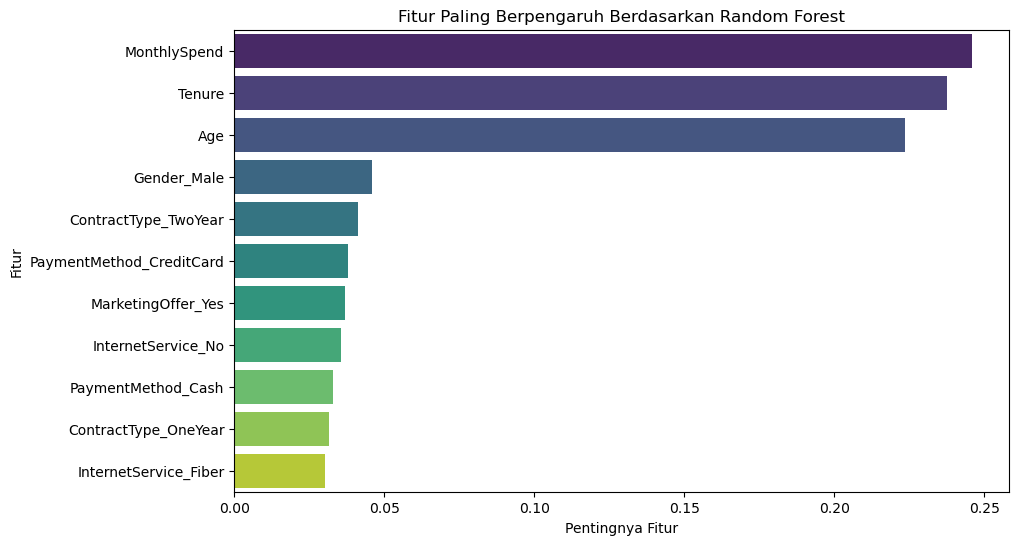

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Misalkan dt adalah DataFrame yang telah dibaca
# Pisahkan fitur dan target
X = dt.drop(['Churn', 'CustomerID'], axis=1)  # Semua fitur kecuali target
y = dt['Churn']  # Target adalah 'Churn'

# Lakukan One-Hot Encoding pada fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True untuk menghindari dummy variable trap

# Pisahkan data menjadi data pelatihan (train) dan pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

# Buat dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Menampilkan pentingnya fitur
feature_importances = rf_model.feature_importances_

# Membuat DataFrame untuk menampilkan fitur dan pentingnya
features = X_encoded.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Urutkan berdasarkan pentingnya fitur
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan hasil numerik
print("Pentingnya Fitur berdasarkan Random Forest:")
print(importance_df)

# Visualisasi dengan barchart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Fitur Paling Berpengaruh Berdasarkan Random Forest')
plt.xlabel('Pentingnya Fitur')
plt.ylabel('Fitur')
plt.show()

##### Short Insight

**Pentingnya Fitur pada Random Forest**

- Fitur MonthlySpend memiliki kontribusi terbesar terhadap keputusan model Random Forest, dengan pentingnya sebesar 24.6%. Fitur ini sepertinya sangat terkait dengan apakah seorang pelanggan akan churn atau tidak.
- Tenure dan Age juga memiliki kontribusi signifikan, masing-masing dengan pentingnya sekitar 23.7% dan 22.4%. Ini menunjukkan bahwa durasi langganan dan usia pelanggan juga merupakan faktor penting dalam memprediksi churn.
- Gender (dalam hal ini Gender_Male) memiliki kontribusi lebih kecil dibandingkan fitur lainnya, tetapi tetap memberikan informasi tambahan bagi model.

### Menggunakan Fitur Penting

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle  # Import untuk shuffle

# Misalkan dt adalah DataFrame yang telah dibaca
# Pisahkan fitur dan target
X = dt[['MonthlySpend', 'Tenure', 'Age']] # Semua fitur kecuali target
y = dt['Churn']  # Target adalah 'Churn'

# Lakukan One-Hot Encoding pada fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True untuk menghindari dummy variable trap

# Shuffle dataset sebelum split
# X_encoded, y = shuffle(X_encoded, y, random_state=42)

# Pisahkan data menjadi data pelatihan (train) dan pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

# 1. Model Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# 2. Model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# 3. Model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# 4. Model Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Menyusun tabel summary akurasi
model_names = ['Naïve Bayes', 'Random Forest', 'Logistic Regression', 'Gradient Boosting']
accuracies = [accuracy_nb, accuracy_rf, accuracy_lr, accuracy_gb]

# Buat DataFrame untuk tabel summary
accuracy_summary = pd.DataFrame({
    'Model': model_names,
    'Akurasi (%)': [acc * 100 for acc in accuracies]
})

print("\nSummary Akurasi Model:")
print(accuracy_summary)

# Optionally, you can print confusion matrices and classification reports for each model:
for model_name, y_pred in zip(model_names, [y_pred_nb, y_pred_rf, y_pred_lr, y_pred_gb]):
    print(f"\nConfusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))


Summary Akurasi Model:
                 Model  Akurasi (%)
0          Naïve Bayes         65.0
1        Random Forest         80.0
2  Logistic Regression         60.0
3    Gradient Boosting         80.0

Confusion Matrix (Naïve Bayes):
[[10  2]
 [ 5  3]]

Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

          No       0.67      0.83      0.74        12
         Yes       0.60      0.38      0.46         8

    accuracy                           0.65        20
   macro avg       0.63      0.60      0.60        20
weighted avg       0.64      0.65      0.63        20


Confusion Matrix (Random Forest):
[[10  2]
 [ 2  6]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

          No       0.83      0.83      0.83        12
         Yes       0.75      0.75      0.75         8

    accuracy                           0.80        20
   macro avg       0.79      0.79      0.79        20
weighted avg 

C:\Users\aanbm04\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aanbm04\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aanbm04\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


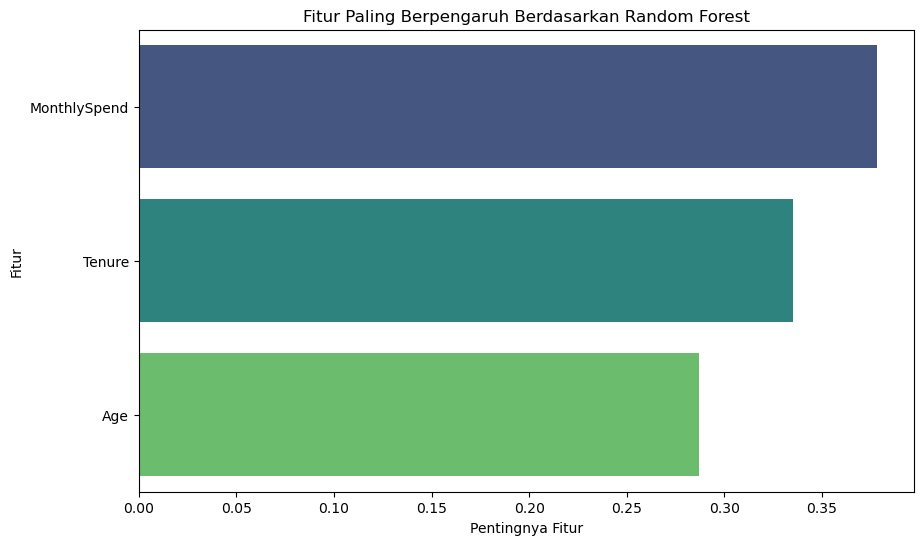

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Misalkan dt adalah DataFrame yang telah dibaca
# Pisahkan fitur dan target
X = dt[['MonthlySpend', 'Tenure', 'Age']] # Semua fitur kecuali target
y = dt['Churn']  # Target adalah 'Churn'

# Lakukan One-Hot Encoding pada fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True untuk menghindari dummy variable trap

# Pisahkan data menjadi data pelatihan (train) dan pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

# Buat dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Menampilkan pentingnya fitur
feature_importances = rf_model.feature_importances_

# Membuat DataFrame untuk menampilkan fitur dan pentingnya
features = X_encoded.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Urutkan berdasarkan pentingnya fitur
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi dengan barchart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Fitur Paling Berpengaruh Berdasarkan Random Forest')
plt.xlabel('Pentingnya Fitur')
plt.ylabel('Fitur')
plt.show()

### Lakukan Cross Validation

In [16]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Misalkan dt adalah DataFrame yang telah dibaca
# Pisahkan fitur dan target
X = dt[['MonthlySpend', 'Tenure', 'Age']]  # Semua fitur numerik
y = dt['Churn']  # Target adalah 'Churn'

# Lakukan One-Hot Encoding pada fitur kategorikal jika ada (di sini diasumsikan tidak ada fitur kategorikal)
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True untuk mencegah dummy variable trap

# Inisialisasi model yang akan dievaluasi
models = {
    "Naïve Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Setup Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 5-fold stratified cross-validation

# Evaluasi model dengan cross-validation
results = []
for model_name, model in models.items():
    # Hitung akurasi menggunakan cross_val_score
    cv_scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='accuracy')
    avg_accuracy = cv_scores.mean() * 100  # Rata-rata akurasi (dalam persen)
    std_dev = cv_scores.std() * 100  # Standar deviasi akurasi (dalam persen)
    results.append({
        'Model': model_name,
        'Rata-rata Akurasi (%)': avg_accuracy,
        'Standar Deviasi (%)': std_dev
    })

# Buat DataFrame untuk tabel hasil
accuracy_summary = pd.DataFrame(results)

# Tampilkan tabel hasil
print("\nHasil Evaluasi Cross-Validation:")
print(accuracy_summary)

# Menampilkan confusion matrix dan classification report untuk model terbaik (opsional)
best_model_name = accuracy_summary.sort_values(by='Rata-rata Akurasi (%)', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]

# Latih ulang model terbaik pada seluruh data pelatihan untuk evaluasi di data uji (opsional)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42, stratify=y)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

print(f"\nConfusion Matrix ({best_model_name}):")
print(confusion_matrix(y_test, y_pred_best))
print(f"\nClassification Report ({best_model_name}):")
print(classification_report(y_test, y_pred_best))


Hasil Evaluasi Cross-Validation:
                 Model  Rata-rata Akurasi (%)  Standar Deviasi (%)
0          Naïve Bayes                   53.5            12.854960
1        Random Forest                   58.5            10.735455
2  Logistic Regression                   52.5             2.500000
3    Gradient Boosting                   55.0             7.416198

Confusion Matrix (Random Forest):
[[9 2]
 [3 6]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

          No       0.75      0.82      0.78        11
         Yes       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20



# HASIL

### Kesimpulan Awal :

Berdasarkan hasil uji statistik dan modeling, banyak variabel yang tidak menunjukkan hubungan signifikan dengan churn. Akurasi model juga masih relatif rendah (sekitar 65-80%, tergantung model) dan tidak menunjukkan hasil yang sangat memuaskan sehingga,

Analisis memerlukan langkah lebih lanjut karena :
- Variabel yang signifikan terhadap churn belum jelas.
- Hasil prediksi dari model kurang akurat untuk membuat rekomendasi strategi yang solid.
- Data tambahan atau analisis mendalam mungkin diperlukan.

**Namun, sebagai hasil awal ada beberapa langkah actionable yang dapat diambil:**

1) Segmentasi Pelanggan Berdasarkan MonthlySpend dan Tenure:

Pelanggan dengan pengeluaran bulanan tinggi (MonthlySpend) dan durasi langganan lama (Tenure) cenderung lebih loyal.
Fokuskan promosi untuk mempertahankan pelanggan baru (Tenure rendah) dengan penawaran khusus seperti diskon jangka pendek.

2) Strategi Kontrak Jangka Panjang:

Pelanggan dengan kontrak TwoYear memiliki tingkat churn lebih rendah dibanding kontrak bulanan.
Tingkatkan insentif untuk pelanggan yang beralih ke kontrak jangka panjang.

3) Efisiensi Layanan Internet:

Pelanggan yang tidak menggunakan layanan internet menunjukkan risiko churn lebih tinggi. Teliti apakah ini disebabkan oleh ketidakpuasan terhadap produk lain atau alasan eksternal.

4) Marketing Offer Perlu Ditingkatkan:

Penawaran marketing tidak berdampak signifikan terhadap churn. Ciptakan program yang lebih menarik dengan menyasar kebutuhan pelanggan berdasarkan data segmentasi.

**Selanjutnya, Untuk Untuk meningkatkan kualitas hasil analisis, langkah berikut perlu dilakukan:**

1) Pengayaan Data:

Tambahkan fitur tambahan seperti kepuasan pelanggan, feedback, frekuensi kontak customer service, dan metrik lainnya yang lebih terkait dengan pengalaman pelanggan.

2) Validasi Eksternal:

Gunakan dataset serupa dari cabang lain untuk memastikan pola yang ditemukan berlaku secara umum.